### Vanden Bussche, Fromment 1995

Tabelle 8 Kp(RWGS)
467K. Berechnet 1.54e+00	Artikel 1.69e+00
489K. Berechnet 1.84e+00	Artikel 2.04e+00
522K. Berechnet 2.34e+00	Artikel 2.64e+00
511K. Berechnet 2.16e+00	Artikel 2.43e+00
360K. Berechnet 5.42e-01	Artikel 5.69e-01
381K. Berechnet 6.86e-01	Artikel 7.24e-01
404K. Berechnet 8.70e-01	Artikel 9.28e-01


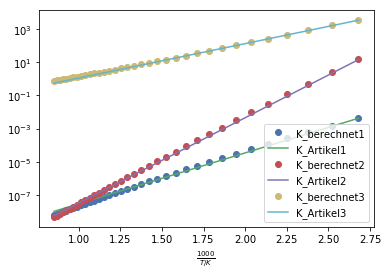

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tc_lib import *
%matplotlib inline
plt.style.use('seaborn-deep')

# Stoechiometrische Koeffizienten
nuij = np.zeros([len(namen), 3])
# Hydrierung von CO2
nuij[[
    namen.index('CO2'),
    namen.index('H2'),
    namen.index('CH3OH'),
    namen.index('H2O'),
    namen.index('CO'),
],0] = np.array([-1, -3, +1, +1, 0], dtype=float)
# Hydrierung von CO
nuij[[
    namen.index('CO2'),
    namen.index('H2'),
    namen.index('CH3OH'),
    namen.index('H2O'),
    namen.index('CO'),
],1] = np.array([0, -2, +1, 0, -1], dtype=float)
# RWGS Rückwassergasshiftreaktion
nuij[[
    namen.index('CO2'),
    namen.index('H2'),
    namen.index('CH3OH'),
    namen.index('H2O'),
    namen.index('CO'),
],2] = np.array([+1, +1, 0, -1, -1], dtype=float)

# Gleichgewichtskonstanten bei T, dem Artikel nach
def k_gg(t):
    k_1 = 10**(3066/t-10.592)
    k_2 = 10**(5139/t-12.621)
    k_3 = 10**(2073/t-2.029)
    return np.array([k_1, k_2, k_3])

# Gleichgewichtskonstanten bei T, berechnet
def k_t(t, nuij):
    h_t = h(t)
    g_t = g(t, h_t)
    k_t = k(t, g_t, nuij)
    return k_t

t = np.linspace(100, 900, 35) + 273.15
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(nuij.shape[1]):
    ax.plot(1000/t, 
            [k_t(temp, nuij)[i] for temp in t],
            'o', label='K_berechnet'+str(i+1))
    ax.plot(1000/t, k_gg(t)[i], 
            '-', label='K_Artikel'+str(i+1))
ax.set_yscale('log')
ax.set_xlabel(r'$\frac{1000}{T/K}$')
ax.legend()

print('Tabelle 8 Kp(RWGS)')
for t in np.array([467, 489, 522, 511, 360, 381, 404]):
    print(
        str(t) + 'K' + '. Berechnet ' +
        '{:.2e}'.format(1/k_t(t+273.15, nuij)[2]*10) + 
        '\t' + 'Artikel ' +
        '{:.2e}'.format(1/k_gg(t+273.15)[2]*10)
    )

### Wedel 1988

In [14]:
k_0_hin = 1.98e+7 # mol/(kg Kat * h * (MPa)^0,58)
ea_hin = 56343 # J/mol
nu_i_hin = np.array([0.18, 0.4, 0]) # CO, H2, CH3OH
k_0_zur = 2.15e+10 # mol/(kg Kat * h * (MPa)^0,13)
ea_zur = 85930 # J/mol
nu_i_zur = np.array([0, 0, 0.13]) # CO, H2, CH3OH
r = 8.314 # J/(mol K) 

def r_j_wedel(k_0, ea, p_i, t, nu_i):
    k_t = k_0 * np.exp(-ea/(r * t))
    return k_t * np.product(np.power(p_i, nu_i))



0.0030628317126543598